### Link to download InceptionV3

### https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

In [2]:
import os

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

In [3]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(input_shape = (150,150,3),
                               include_top=False,
                               weights = None)

pre_trained_model.load_weights(r'C:\Users\Srishti\models\inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')

In [4]:
for layer in pre_trained_model.layers:
    layer.trainable = False

In [5]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [6]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [7]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(last_output)

x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.compile(optimizer = RMSprop(learning_rate = 0.0001),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [9]:
base_dir = 'cats_and_dogs_filtered/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join('dogs-vs-cats/', 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale = 1.0/255.0)
test_datagen = ImageDataGenerator(rescale = 1.0/255.0)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary',
                                                    target_size = (150,150))

validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                        batch_size = 20,
                                                        class_mode = 'binary',
                                                        target_size = (150,150))

test_generator = test_datagen.flow_from_directory(test_dir,
                                                 class_mode = 'binary',
                                                 target_size = (150,150))
                                                    

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
history = model.fit(train_generator,
                   validation_data = validation_generator,
                   steps_per_epoch = 100,
                   epochs = 20,
                   validation_steps = 50,
                   verbose = 2)

Epoch 1/20
100/100 - 58s - loss: 0.3331 - accuracy: 0.8665 - val_loss: 0.2346 - val_accuracy: 0.9000
Epoch 2/20
100/100 - 24s - loss: 0.2099 - accuracy: 0.9120 - val_loss: 0.2063 - val_accuracy: 0.9310
Epoch 3/20
100/100 - 24s - loss: 0.1920 - accuracy: 0.9300 - val_loss: 0.2083 - val_accuracy: 0.9160
Epoch 4/20
100/100 - 24s - loss: 0.1936 - accuracy: 0.9275 - val_loss: 0.1907 - val_accuracy: 0.9290
Epoch 5/20
100/100 - 24s - loss: 0.1906 - accuracy: 0.9350 - val_loss: 0.1887 - val_accuracy: 0.9330
Epoch 6/20
100/100 - 24s - loss: 0.1867 - accuracy: 0.9335 - val_loss: 0.1466 - val_accuracy: 0.9460
Epoch 7/20
100/100 - 24s - loss: 0.1825 - accuracy: 0.9375 - val_loss: 0.3038 - val_accuracy: 0.9050
Epoch 8/20
100/100 - 24s - loss: 0.1555 - accuracy: 0.9425 - val_loss: 0.2182 - val_accuracy: 0.9320
Epoch 9/20
100/100 - 25s - loss: 0.1801 - accuracy: 0.9340 - val_loss: 0.1999 - val_accuracy: 0.9310
Epoch 10/20
100/100 - 25s - loss: 0.1642 - accuracy: 0.9410 - val_loss: 0.1505 - val_accura

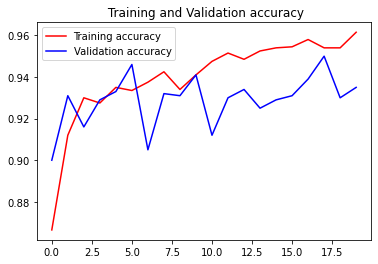

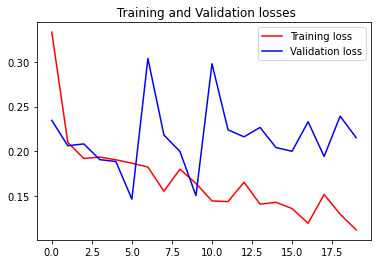

In [18]:
import matplotlib.pyplot as plt

acc= history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title(' Training and Validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title(' Training and Validation losses')
plt.legend()

plt.show()

In [16]:
model.predict(test_generator)

array([[1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [2.65775180e-10],
       [1.36496751e-11],
       [1.00000000e+00],
       [1.00000000e+00],
       [2.74252354e-08],
       [1.00000000e+00],
       [2.00935709e-03],
       [1.00000000e+00],
       [6.95014671e-11],
       [6.46157884e-18],
       [9.99997616e-01],
       [8.89203339e-19],
       [1.00000000e+00],
       [6.13874290e-04],
       [3.24644992e-04],
       [1.93964867e-21],
       [4.86230034e-09],
       [3.80268798e-16],
       [1.77051502e-14],
       [8.84888820e-08],
       [4.82766097e-18],
       [9.99953389e-01],
       [4.38057250e-17],
       [7.26442158e-01],
       [9.95817482e-01],
       [1.36340120e-07],
       [9.48456228e-01],
       [1.00000000e+00],
       [9.99999762e-01],
       [1.44241677e-18],
       [1.36430725e-03],
       [3.17093641e-01],
       [3.55038710e-09],
       [1.30296017e-19],
       [9.99997616e-01],
       [6.85864234e-13],


In [20]:
import numpy as np

np.round(model.predict(test_generator))

array([[1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],

## Horses and Human

In [27]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('loss')<0.01):
            print("losses are below 1 %")
            self.model.stop_training = True

In [28]:
train_dir = 'horse-or-human'
validation_dir = 'validation-horse-or-human'


train_gen = ImageDataGenerator(rescale=1.0/255,
                              rotation_range = 40,
                              width_shift_range = 0.2,
                              height_shift_range = 0.2,
                              shear_range = 0.2,
                              zoom_range = 0.2,
                              horizontal_flip = True)

validation_gen = ImageDataGenerator(rescale = 1.0/255)

train_generator = train_gen.flow_from_directory(train_dir,
                                               batch_size=20,
                                               class_mode ='binary',
                                               target_size = (150,150))

validation_generator = validation_gen.flow_from_directory(validation_dir,
                                                         batch_size = 20,
                                                         class_mode = 'binary',
                                                         target_size = (150,150))


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
callbacks = myCallback()

history = model.fit(train_generator, epochs =3,
                   verbose =2,
                   validation_data = validation_generator,
                   callbacks = [callbacks])

Epoch 1/3
52/52 - 11s - loss: 0.0333 - accuracy: 0.9864 - val_loss: 0.0527 - val_accuracy: 0.9805
Epoch 2/3


In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'bo', label = 'training accuracy')
plt.plot(epochs,val_acc, 'b', label = 'validation accuracy')
plt.legend()
plt.title('trainig vs validation accuracy')
plt.figure()

plt.plot(epochs,loss,'bo', label = 'training loss')
plt.plot(epochs,val_loss, 'b', label = 'validation loss')
plt.legend()
plt.title('trainig vs validation loss')
plt.figure()

plt.show()